## Overview

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, DataCamp has provided the following questions to be answered:
1. What is the most commonly awarded gender and birth country?
2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
4. Who was the first woman to receive a Nobel Prize, and in what category?
5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [3]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Read file
df = pd.read_csv('../data/nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [6]:
df.shape


(1000, 18)

### What is the most commonly awarded gender?

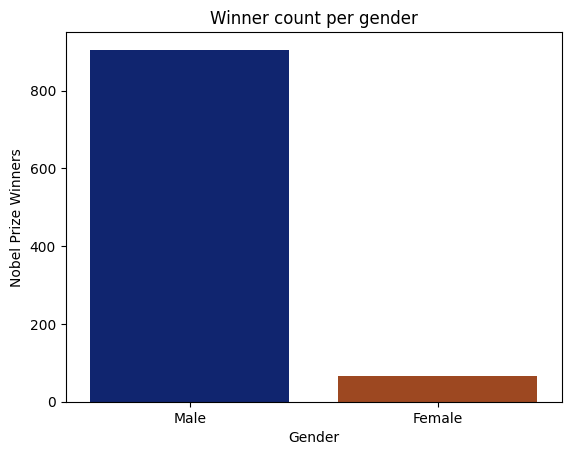

Most commonly awarded gender: Male


In [7]:
gender_counts = df['sex'].value_counts()

# Visualize using a barplot
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette='dark', legend=False)
plt.title('Winner count per gender')
plt.xlabel('Gender')
plt.ylabel('Nobel Prize Winners')
plt.show()

# Most commonly awarded gender
top_gender = gender_counts.idxmax()
print("Most commonly awarded gender: " + top_gender)

### What is the most commonly awarded birth country?

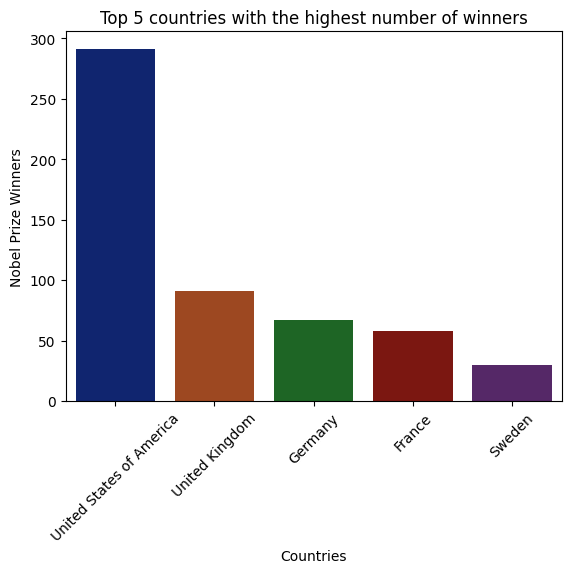

Most commonly awarded birth country: United States of America


In [8]:
# What is the most commonly awarded birth country?
country_counts = df['birth_country'].value_counts().head()

# Visualize using a barplot
sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette='dark', legend=False)
plt.title('Top 5 countries with the highest number of winners')
plt.xlabel('Countries')
plt.ylabel('Nobel Prize Winners')
plt.xticks(rotation=45)
plt.show()

# Identify the most commonly awarded birth country
top_country = country_counts.idxmax()
print("Most commonly awarded birth country: " + top_country)

### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

<Figure size 1200x600 with 0 Axes>

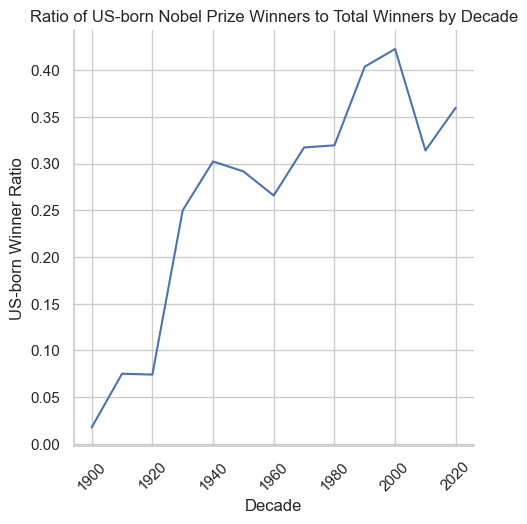

The decade with the highest ratio of US-born Nobel Prize winners to total winners is: 2000
The highest ratio is: 0.42


In [9]:
# Create decade column
df['decade'] = (np.floor(df['year']/10) * 10).astype(int)

# Calculate the total number of winners per decade
total_winners_per_decade = df.groupby('decade')['year'].count()

# Calculate the number of US-born winners per decade
us_winners_per_decade = df[df['birth_country'] == 'United States of America'].groupby('decade')['year'].count()

# Compute the ratio of US-born winners to total winners for each decade
ratio_per_decade = us_winners_per_decade / total_winners_per_decade

# Convert the ratio Series to a DataFrame and rename the column
usa_ratio_df = ratio_per_decade.reset_index(name='us_winner_ratio')

# Visualize ratio of US-born winners to total winners for each decade using a sns.relplot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.relplot(x='decade', y='us_winner_ratio', kind='line', data=usa_ratio_df)
plt.title('Ratio of US-born Nobel Prize Winners to Total Winners by Decade')
plt.xlabel('Decade')
plt.ylabel('US-born Winner Ratio')
plt.xticks(rotation=45)
plt.show()

# Identify the decade with the highest ratio
max_decade_usa = int(ratio_per_decade.idxmax())
max_usa_ratio = ratio_per_decade.max()

# Print the results
print(f"The decade with the highest ratio of US-born Nobel Prize winners to total winners is: {max_decade_usa}")
print(f"The highest ratio is: {max_usa_ratio:.2f}")

### Which decade and Nobel Prize category combination had the highest proportion of female laureates?

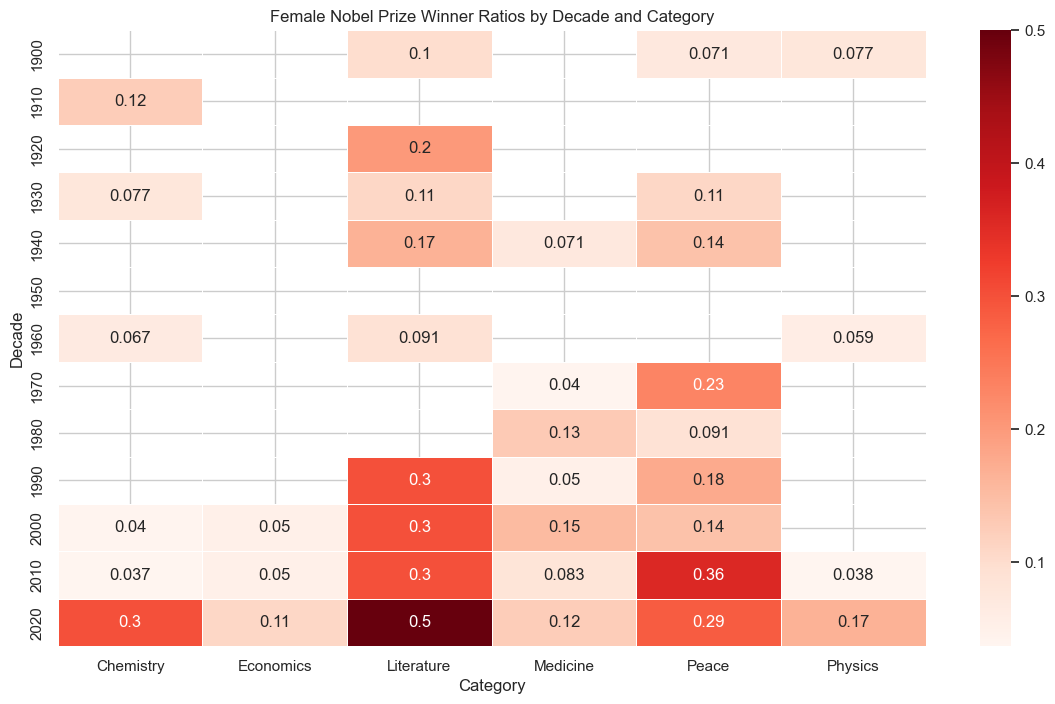

Decade and Nobel Prize category combination that had the highest proportion of female laureates: 
	>> Decade: 2020
	>> Category: Literature
The highest ratio is: 0.5


In [10]:
# Calculate the total number of winners per decade and category
total_winners_per_decade_categ = df.groupby(['decade', 'category'])['year'].count()

# Calculate the number of female winners decade and category
fem_winners_per_decade = df[df['sex'] == 'Female'].groupby(['decade', 'category'])['year'].count()

# Compute the ratio of female winners to total winners for each decade
fem_ratio_per_decade = fem_winners_per_decade / total_winners_per_decade_categ

# Convert the ratio series to a df
fem_ratio_df = fem_ratio_per_decade.reset_index(name='fem_winner_ratio')

# Pivot the DataFrame for heatmap plotting
heatmap_data = fem_ratio_df.pivot(index='decade', columns='category', values='fem_winner_ratio')

# Plot a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', linewidths=.5)
plt.title('Female Nobel Prize Winner Ratios by Decade and Category')
plt.xlabel('Category')
plt.ylabel('Decade')
plt.show()

# Find the index of the maximum ratio
max_idx = fem_ratio_df['fem_winner_ratio'].idxmax()

# Extract the corresponding decade, category, and ratio: store as a dictionary
max_ratio_row = fem_ratio_df.loc[max_idx]
max_female_dict = {int(max_ratio_row['decade']): max_ratio_row['category']}
max_fem_ratio = max_ratio_row['fem_winner_ratio']

print("Decade and Nobel Prize category combination that had the highest proportion of female laureates: ")
print(f"\t>> Decade: {list(max_female_dict.keys())[0]}\n\t>> Category: {list(max_female_dict.values())[0]}")
print(f"The highest ratio is: {max_fem_ratio}")

### Who was the first woman to receive a Nobel Prize, and in what category?

In [11]:
# Filter df with only female winners
fem_df = df[df['sex']=='Female']
first_woman_win = fem_df[fem_df['year'] == fem_df['year'].min()]
first_woman_name = first_woman_win['full_name'].iloc[0]
first_woman_category = first_woman_win['category'].iloc[0]

print("First woman to receive a Nobel Prize: " + first_woman_name)
print("Category: " + first_woman_category)

First woman to receive a Nobel Prize: Marie Curie, née Sklodowska
Category: Physics


### Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [12]:
# Calculate the number of wins per individual
indiv_wins = df['full_name'].value_counts()

# Filter out individuals with more than one win
indiv_wins = indiv_wins[indiv_wins > 1]

# Store as a list
repeat_list = list(indiv_wins.index)

# Print list
print("Individuals or organizations that have won more than one Nobel Prize throughout the years: ")
for name in repeat_list:
    print("\t> " + name)

Individuals or organizations that have won more than one Nobel Prize throughout the years: 
	> Comité international de la Croix Rouge (International Committee of the Red Cross)
	> Frederick Sanger
	> Marie Curie, née Sklodowska
	> Office of the United Nations High Commissioner for Refugees (UNHCR)
	> John Bardeen
	> Linus Carl Pauling
